In [3]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import warnings

In [2]:
time=[35]
models = ["GAM"]
taxas=["Mammals"]
scenarios=["rcp26"]

In [6]:
years= ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']
year_indices = {35: 9, 65: 12, 85: 13}
selected_year = years[year_indices[time[0]]]
if time[0] == 35 or time[0] == 65:
    GCMs = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
    bioscen_GCMs = ['GFDL.ESM2M', 'IPSL.CM5A-LR', 'HadGEM2.ES', 'MIROC5']
    scenarios = ["rcp26","rcp60"]
    ssprcps_shorts = ["ssp126","ssp460"]
elif time[0] == 85:
    GCMs = ['IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
    bioscen_GCMs = ['IPSL.CM5A-LR', 'HadGEM2.ES', 'MIROC5']
    scenarios = ["rcp26"]
    ssprcps_shorts = ["ssp126"]
    
#combinations = list(itertools.product(models, model_names))

for taxa in taxas:# Get all possible combinations of models and model_names    
    for model in models :
        for i in range(len(GCMs)):  # Iterate over the range of GCMs length
            GCM = GCMs[i]
            bioscen_GCM = bioscen_GCMs[i]
            print("GCM", GCM)
            for scenario in scenarios:
                print ("Scneario", scenario)
                for l, ssprcp_short in enumerate(ssprcps_shorts):

                    convcodes = pd.read_csv("/storage/homefs/ch21o450/scripts/BioScenComb/data/IUCN_LUH_converion_table_Carlson.csv")
                    dir_habclass = "/storage/homefs/ch21o450/IUCN/Habitat_Classifications/" + taxa + "/"

                    dir_species = "/storage/workspaces/wa_climate/climate_trt/data/BioScen15/individual_projections/" + taxa+ "_" + model +"_results_climate/"
                    available_file = os.listdir(dir_species)
                    available_names = [x.split(".csv")[0] for x in available_file]

                    formatted_names = []

                    for species_name in available_names[:1]:
                        split_species_name = species_name.split("_")[:2]
                        formatted_species_name = " ".join(split_species_name)
                        formatted_names.append(formatted_species_name)

                    results = []
                    for i, species_name in enumerate(formatted_names[:1]):
                        formatted_species_name = species_name.replace(" ", "_")

                        for file_name in available_file:
                            if formatted_species_name in file_name and model + '_dispersal.csv.xz' in file_name:
                                species_file = file_name
                                species_file2 = [x.split(".csv")[0] for x in species_file] 
                                break
                        else:
                            bioscen_species = None
                            continue
                            
                        bioscen_species = pd.read_csv(dir_species + file_name)

GCM GFDL-ESM2M
Scneario rcp26
Scneario rcp60
GCM IPSL-CM5A-LR
Scneario rcp26
Scneario rcp60
GCM HadGEM2-ES
Scneario rcp26
Scneario rcp60
GCM MIROC5
Scneario rcp26
Scneario rcp60


In [18]:
bioscen_species

,x,y,GFDL.ESM2M_piControl_1845,HadGEM2.ES_piControl_1845,IPSL.CM5A-LR_piControl_1845,MIROC5_piControl_1845,GFDL.ESM2M_historical_1990,HadGEM2.ES_historical_1990,IPSL.CM5A-LR_historical_1990,MIROC5_historical_1990,...,HadGEM2.ES_rcp26_2250,IPSL.CM5A-LR_rcp26_2250,MIROC5_rcp26_2250,presence,dispersal4,dispersal3,dispersal2,dispersal1,fulldisp,areaKM2
0,-179.75,65.25,0.249998,0.429767,0.037942,0.151012,0.469367,0.327700,0.258387,0.412357,...,0.789315,0.571203,0.695040,NaN,NaN,NaN,NaN,NaN,1,1291.896405
1,-179.75,65.75,0.183058,0.114092,0.036052,0.155225,0.511097,0.154308,0.306635,0.446588,...,0.799318,0.529443,0.803918,NaN,NaN,NaN,NaN,NaN,1,1267.420563
2,-179.75,66.25,0.011763,0.007655,0.000948,0.031570,0.105427,0.010465,0.014830,0.050957,...,0.649680,0.228830,0.650595,NaN,NaN,NaN,NaN,NaN,1,1242.846695
3,-179.75,66.75,0.004318,0.002233,0.000042,0.005320,0.023305,0.003110,0.000778,0.015538,...,0.504435,0.067173,0.298335,NaN,NaN,NaN,NaN,NaN,1,1218.176684
4,-179.75,67.25,0.001005,0.000107,NaN,0.000223,0.002743,0.000103,0.000035,0.001243,...,0.109795,0.009762,0.022722,NaN,NaN,NaN,NaN,NaN,1,1193.412424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23053,101.75,36.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000002,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,2468.630417
23054,107.25,67.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000003,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,1193.412424
23055,134.25,46.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000002,0.000002,NaN,NaN,1.0,1.0,NaN,NaN,1,2112.242876
23056,135.25,48.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000007,0.000003,NaN,NaN,1.0,1.0,NaN,NaN,1,2052.921527


In [4]:
species_names = ['Vulpes_vulpes']

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


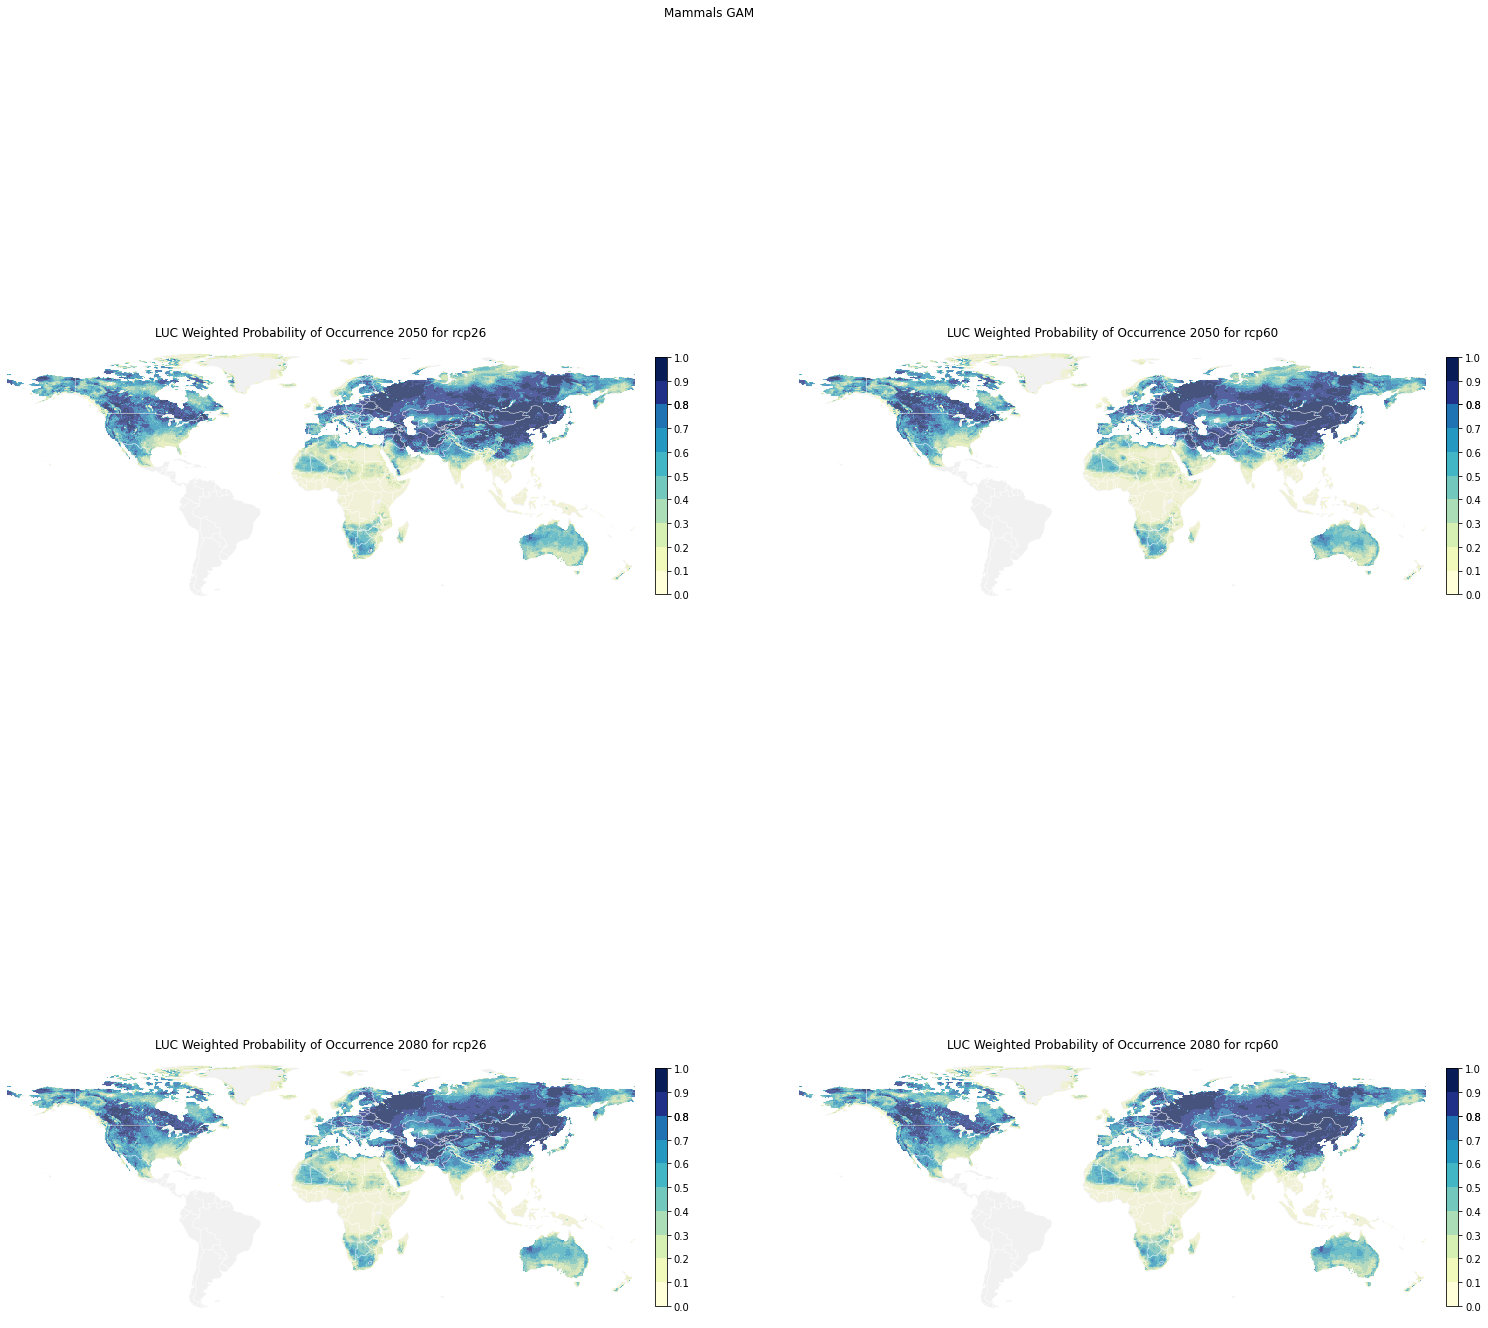

In [5]:
#### Comparison with vs without Land-use filter #### 
#one scenario at a time # 


models=["GAM"] 
taxas =["Mammals"]

model_names = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
#model_names = ['GFDL-ESM2M']

years= ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050', 
                 '2052', '2056', '2080', '2100', '2150', '2200', '2250']

for taxa in taxas:
    for model in models:


   
        def newvalue_fun(time, model, model_names,netcdf_path_format, is_historical=False, scenario=None):
            newvalue_dict = {model: {model_name: {} for model_name in model_names} for model in models}
            sum_bin_dict = {model: {model_name: {} for model_name in model_names} for model in models}
            
            for model in models:
                for model_name in model_names:
                    for species_name in species_names:
                        ds = xr.open_dataset(netcdf_path_format.format(model, taxa, model_name, scenario, species_name, time), decode_times=False)
                        #newvalue = ds["newvalue"]
                        sum_bin = ds["sum_bin"]

                        #newvalue_dict[model][model_name][species_name] = newvalue
                        sum_bin_dict[model][model_name][species_name] = sum_bin

                projections_dict = {}

            for species_name in species_names:
                value_list = []
                for model in models:
                    for model_name in model_names:
                        value_bin = sum_bin_dict[model][model_name][species_name]
                        value_list.append(value_bin)
                value_bin_concat = xr.concat(value_list, dim="model")
                mean_value_bin = value_bin_concat.mean(dim="model")
                projections_dict[species_name] = mean_value_bin

            value_bin_list = list(projections_dict.values())
            mean_value_bin = xr.concat(value_bin_list, dim="species").mean(dim="species")

            return mean_value_bin

future_times = [35, 65]

netcdf_path_format_future = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(26, 24), subplot_kw={'projection': ccrs.PlateCarree()})


cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(
              gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

for future_time in future_times:
    if future_time == 35 or future_time == 65:
        model_names = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
        scenarios = ["rcp26","rcp60"]
    elif future_time == 85:
        model_names = ['IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
        scenarios = ["rcp26"]
    for scenario in scenarios:
        if future_time == 85 and scenario == "rcp60":
            continue

        # Call both functions and unpack their return values
        mean_value_bin_gam = newvalue_fun(future_time, ["GAM"], model_names, netcdf_path_format_future, is_historical=False, scenario=scenario)
        mean_value_bin_gam = mean_value_bin_gam.isel(time=0)
        #mean_value_bin_gbm = newvalue_fun(future_time, ["GBM"], model_names, netcdf_path_format_future, is_historical=False, scenario=scenario)
        # Calculate the difference between the two
        # diff_bin = mean_sum_bin -mean_value_bin

        # Create three subplots for each future time and scenario
        if plot_idx >= len(axes.flatten()):
            break
        ax1 = axes.flatten()[plot_idx]
        #ax2 = axes.flatten()[plot_idx + 1]


        # Plotting code starts here
        cmap = plt.colormaps['YlGnBu']
        boundaries = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.9,1] # Adjust these values according to your data
        norm = BoundaryNorm(boundaries, cmap.N)

        im = ax1.pcolormesh(mean_value_bin_gam['lon'].values, mean_value_bin_gam['lat'].values, np.where(mean_value_bin_gam.values != 0, mean_value_bin_gam.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

        countries.plot(ax=ax1, color="lightgray", zorder=1, alpha=0.3)
        ax1.set_title(f"LUC Weighted Probability of Occurrence {year_indices[future_time]} for {scenario}")



        ax1.axis('off')
        ax1.set_extent((-180,180,-63,90))
        ax1.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)

        ticks_b = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.9,1])
        tick_labels = [str(int(tick)) for tick in ticks_b]
        cbar =  plt.colorbar(im, ax=ax1, fraction=0.018, pad=0.03, spacing='proportional', ticks=ticks_b)

        # Increase the plot index by 2 to move to the next pair of subplots
        plt.suptitle(taxa + " " + model)
        plot_idx += 1